# RANDOM FORESTS ALGORITHM
#### MATH CONCEPTS FOR DEVELOPERS, FINAL PROJECT - SOFTUNI 2025

#### Random Forest Classifier Demonstration
##### This notebook demonstrates how the Random Forest algorithm works on classification problems using real datasets.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Classification and Regression
from sklearn.model_selection import train_test_split # Split data into training and test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error # Model evaluation

In [3]:
# import kagglehub
# 
# # Download latest version
# path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
# 
# print("Path to dataset files:", path)

#Here we download dataset

### Breast Cancer Wisconsin (Diagnostic) Data Set

In [4]:
data = pd.read_csv("data/data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### Main Features and Their Meanings

Each sample in the dataset represents measurements of a breast cell nucleus extracted from a digital image taken during a fine needle aspiration (FNA). The dataset includes 30 features derived from 10 main physical characteristics, each calculated using three statistical methods: mean (average), standard error (SE), and worst (maximum value). These measurements help determine whether a tumor is benign or malignant.

1. **Radius** – The mean distance from the center of the nucleus to the cell perimeter.  
   This value reflects the overall size of the cell. Larger radius values are often associated with malignant tumors.

2. **Texture** – The standard deviation of gray-scale values in the cell image.  
   It reflects the variation in pixel intensity across the cell surface.  
   - Low texture → smooth and uniform cells (likely benign)  
   - High texture → irregular and rough cells (likely malignant)

3. **Perimeter** – The total length of the cell boundary.  
   It is directly related to radius and gives an estimate of how large and complex the shape of the cell is.

4. **Area** – The area enclosed by the cell boundary.  
   A larger area typically indicates a larger cell size, which can be a sign of abnormal or malignant cells.

5. **Smoothness** – Measures local variation in the cell boundary.  
   Lower values mean the edges of the cell are smooth and regular. Higher values suggest jagged or irregular edges, which are common in malignant cells.

6. **Compactness** – Calculated as (perimeter² / area) - 1.0.  
   This measures how closely packed the cell contents are. Higher values indicate more irregular or extended cell shapes.

7. **Concavity** – Describes the extent of concave (inward-curved) sections of the cell boundary.  
   Deep concavities are typically seen in irregular, potentially malignant cell shapes.

8. **Concave Points** – The number of distinct concave portions along the cell boundary.  
   A higher number indicates more indentations or notches, often found in abnormal cells.

9. **Symmetry** – Measures how symmetrical the cell is in shape.  
   Healthy (benign) cells tend to be more symmetrical, while malignant ones often display asymmetry.

10. **Fractal Dimension** – Describes the complexity of the cell boundary.  
    Higher fractal dimension means the border is more irregular and complex, which may be a characteristic of malignancy.

Each of the above features is measured in three different ways:

- `mean`: The average value of the feature across multiple measurements in a single image.
- `se` (standard error): The estimated variation or uncertainty in that measurement.
- `worst`: The maximum value observed for the feature (e.g., largest radius or most irregular texture).

Тhese 30 numerical features form the input variables used by machine learning models to predict the tumor class (benign or malignant).



### Diagnosis
##### M - Malignant, indicating a cancerous (dangerous) tumor.
##### B - Benign, indicating a non-cancerous (harmless) tumor.

In [5]:
counts_m = data['diagnosis'].value_counts()
counts_m

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
data = pd.read_csv('data/data.csv')
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


### Smoothness Mean

**Smoothness Mean** measures the regularity of the cell nucleus boundary by quantifying local variations in radius lengths. Lower values indicate smoother, more regular shapes; higher values suggest irregularity, often linked to malignancy.


In [7]:
df = data[['diagnosis', 'smoothness_mean']]
df

,diagnosis,smoothness_mean
0,M,0.11840
1,M,0.08474
2,M,0.10960
3,M,0.14250
4,M,0.10030
...,...,...
564,M,0.11100
565,M,0.09780
566,M,0.08455
567,M,0.11780


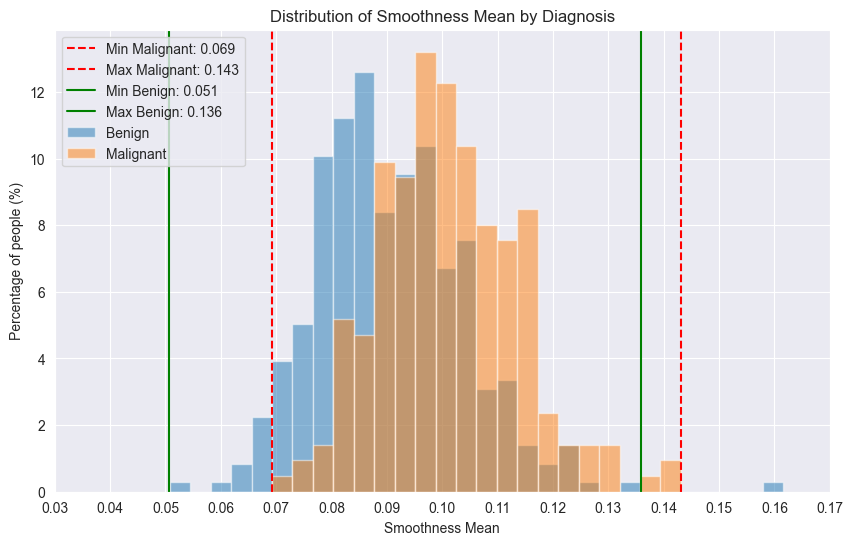

In [8]:
benign = df[df['diagnosis'] == 'B']['smoothness_mean']
malignant = df[df['diagnosis'] == 'M']['smoothness_mean']

min_malignant = malignant.min() - 0.0045
max_malignant = malignant.max() - 0.0015
min_benign = benign.min() - 0.002
max_benign = benign.max() - 0.0275

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Smoothness Mean by Diagnosis')
plt.xlabel('Smoothness Mean')
plt.ylabel('Percentage of people (%)')

plt.axvline(min_malignant, color='red', linestyle='--', label=f'Min Malignant: {min_malignant:.3f}')
plt.axvline(max_malignant, color='red', linestyle='--', label=f'Max Malignant: {max_malignant:.3f}')
plt.axvline(min_benign, color='green', linestyle='-', label=f'Min Benign: {min_benign:.3f}')
plt.axvline(max_benign, color='green', linestyle='-', label=f'Max Benign: {max_benign:.3f}')

plt.xticks(np.arange(0.03, 0.17, 0.01))

plt.legend()
plt.show()



In [9]:
percent_of_benign_under = ((df.smoothness_mean < 0.069).sum() / len(df)) * 100
percent_of_benign_under
# Under 0.069 smoothness mean are diagnosis with B (benign tumor). This case are 1.23 % of people.

np.float64(1.2302284710017575)

In [10]:
percent_of_benign_above = ((df.smoothness_mean > 0.143).sum() / len(df)) * 100
percent_of_benign_above
# Smoothness mean 0.143 is the last for M diagnosis. Next case is with more than 0.16 smoothness mean with diagnosis B. This extreme case does not describe a specific group of people, but only individual cases that cannot give us a good overall picture and information.

np.float64(0.35149384885764495)

In [11]:
percent_of_benign_above_1 = ((df['smoothness_mean'] < 0.1) & (df['smoothness_mean'] > 0.069) & (df['diagnosis'] == 'B')).sum() / len(df) * 100
percent_of_benign_above_1

# 42.17% with smoothness mean between 0.069 and 0.1 have diagnosis B (Benign tumor)

np.float64(44.63971880492091)

### Radius mean

**Radius Mean** represents the average distance from the center of the cell nucleus to its boundary. It is a key indicator of cell size, with larger values often associated with malignant tumors.


In [12]:
df = data[['diagnosis', 'radius_mean']]
df

,diagnosis,radius_mean
0,M,17.99
1,M,20.57
2,M,19.69
3,M,11.42
4,M,20.29
...,...,...
564,M,21.56
565,M,20.13
566,M,16.60
567,M,20.60


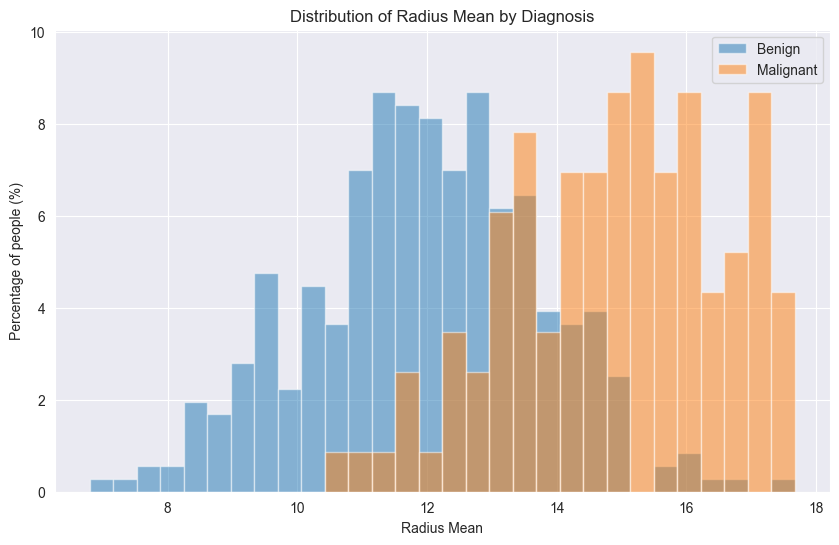

In [13]:
benign = df[df['diagnosis'] == 'B']['radius_mean']
malignant = df[df['diagnosis'] == 'M']['radius_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()


### Texture mean

**Texture Mean** measures the average variation in gray-level values (pixel intensity) within the cell nucleus, reflecting its surface roughness. Higher values may indicate irregular structure, often seen in malignant cells.


In [14]:
df = data[['diagnosis', 'texture_mean']]
df

,diagnosis,texture_mean
0,M,10.38
1,M,17.77
2,M,21.25
3,M,20.38
4,M,14.34
...,...,...
564,M,22.39
565,M,28.25
566,M,28.08
567,M,29.33


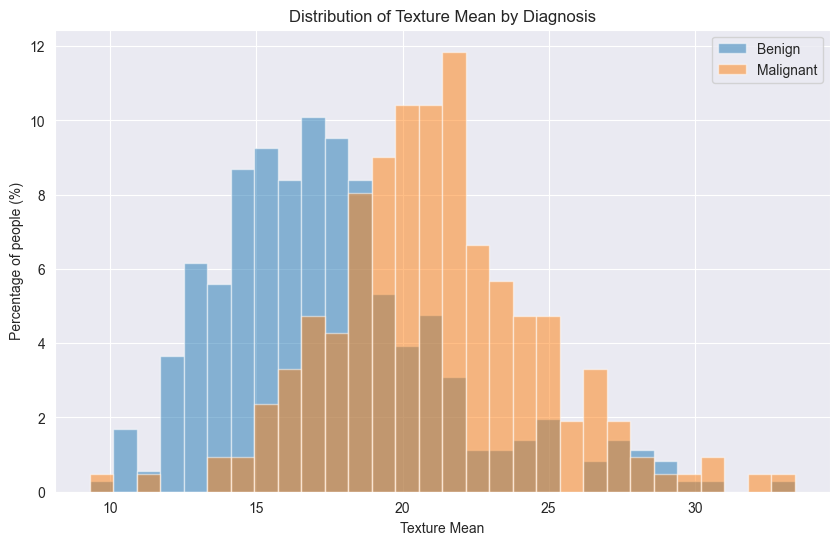

In [15]:
benign = df[df['diagnosis'] == 'B']['texture_mean']
malignant = df[df['diagnosis'] == 'M']['texture_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Texture Mean by Diagnosis')
plt.xlabel('Texture Mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

##### Smoothness is related to the shape and contour.
##### Texture is related to the internal texture and visual appearance of the cell.

### Perimeter mean

**Perimeter Mean** measures the average length of the boundary of the cell nuclei. Irregular or larger perimeters are often linked to malignant tumors.


In [16]:
df = data[['diagnosis', 'perimeter_mean']]
df

,diagnosis,perimeter_mean
0,M,122.80
1,M,132.90
2,M,130.00
3,M,77.58
4,M,135.10
...,...,...
564,M,142.00
565,M,131.20
566,M,108.30
567,M,140.10


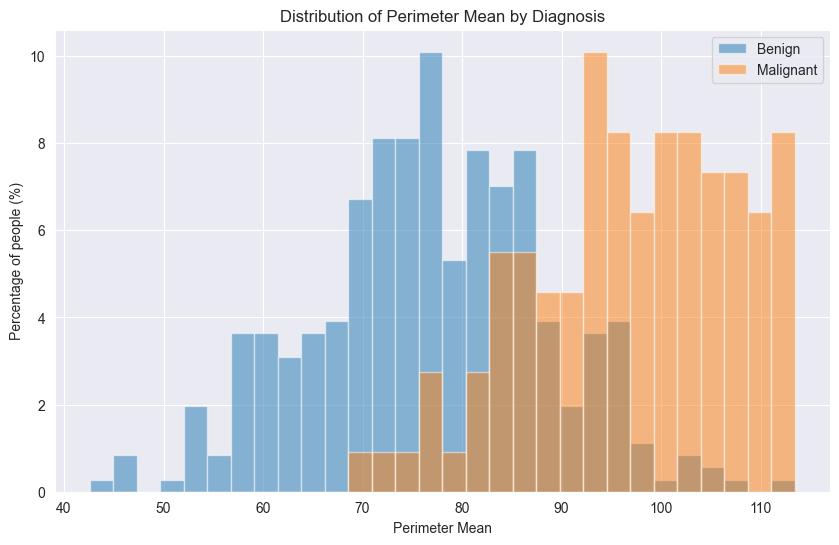

In [17]:
benign = df[df['diagnosis'] == 'B']['perimeter_mean']
malignant = df[df['diagnosis'] == 'M']['perimeter_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Perimeter Mean by Diagnosis')
plt.xlabel('Perimeter Mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

### Area mean

**Area Mean** represents the average size (in pixels) of the cell nuclei. Larger areas can indicate abnormal growth and are often associated with malignant tumors.


In [18]:
df = data[['diagnosis', 'area_mean']]
df

,diagnosis,area_mean
0,M,1001.0
1,M,1326.0
2,M,1203.0
3,M,386.1
4,M,1297.0
...,...,...
564,M,1479.0
565,M,1261.0
566,M,858.1
567,M,1265.0


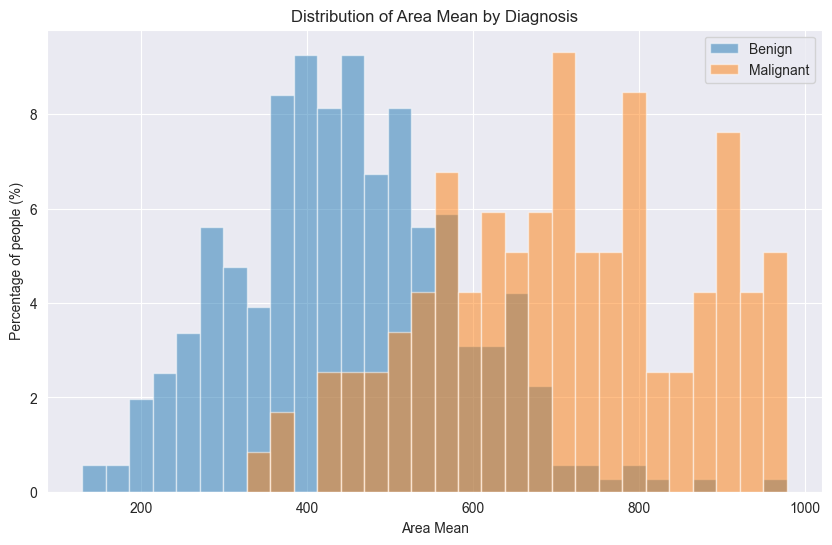

In [19]:
benign = df[df['diagnosis'] == 'B']['area_mean']
malignant = df[df['diagnosis'] == 'M']['area_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Area Mean by Diagnosis')
plt.xlabel('Area Mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

### Compactness mean

$$\text{Compactness} = \frac{(\text{Perimeter})^2}{\text{Area}} - 1$$

Lower values indicate a rounder, more regular shape (often benign), while higher values suggest an irregular, distorted shape (often malignant).

In [20]:
df = data[['diagnosis', 'compactness_mean']]
df

,diagnosis,compactness_mean
0,M,0.27760
1,M,0.07864
2,M,0.15990
3,M,0.28390
4,M,0.13280
...,...,...
564,M,0.11590
565,M,0.10340
566,M,0.10230
567,M,0.27700


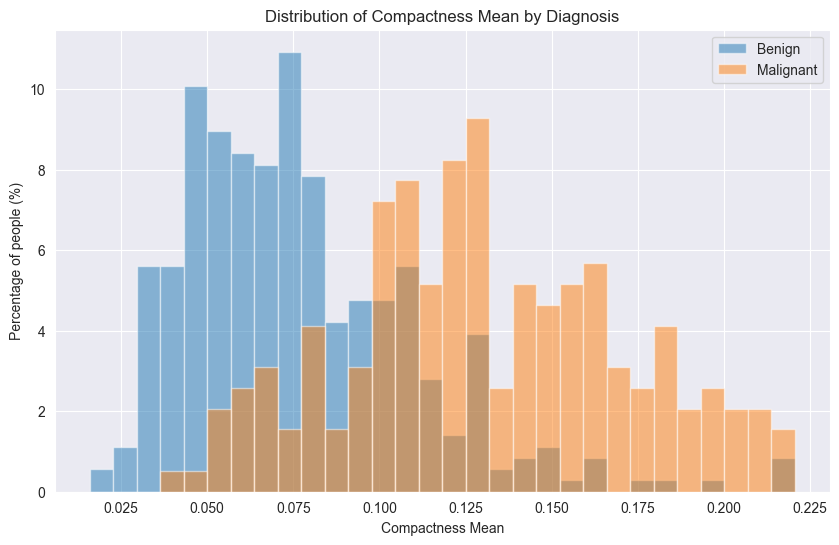

In [21]:
benign = df[df['diagnosis'] == 'B']['compactness_mean']
malignant = df[df['diagnosis'] == 'M']['compactness_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Compactness Mean by Diagnosis')
plt.xlabel('Compactness Mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

### Concavity mean

**Concavity** measures the extent of inward curves (indentations) along the cell's contour. It is calculated algorithmically by analyzing the differences between the cell's actual shape and its convex hull. Higher concavity indicates more irregular and distorted cell boundaries, often associated with malignant tumors.


In [22]:
df = data[['diagnosis', 'concavity_mean']]
df

,diagnosis,concavity_mean
0,M,0.30010
1,M,0.08690
2,M,0.19740
3,M,0.24140
4,M,0.19800
...,...,...
564,M,0.24390
565,M,0.14400
566,M,0.09251
567,M,0.35140


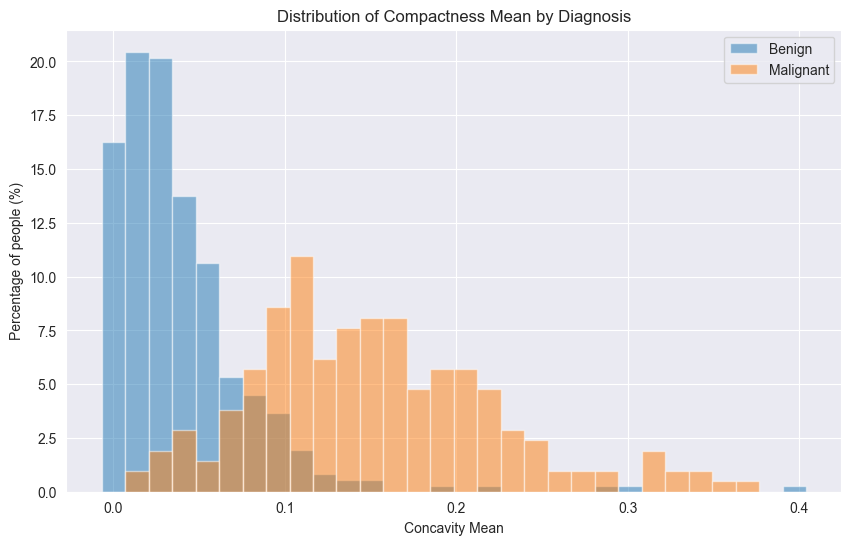

In [23]:
benign = df[df['diagnosis'] == 'B']['concavity_mean']
malignant = df[df['diagnosis'] == 'M']['concavity_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Compactness Mean by Diagnosis')
plt.xlabel('Concavity Mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

### Concave points mean

**Concave Points Mean** measures the average number of distinct inward indentations (concave regions) along the cell nucleus boundary. Higher values indicate more irregular shapes, which are often associated with malignant tumors.


In [24]:
df = data[['diagnosis', 'concave points_mean']]
df

,diagnosis,concave points_mean
0,M,0.14710
1,M,0.07017
2,M,0.12790
3,M,0.10520
4,M,0.10430
...,...,...
564,M,0.13890
565,M,0.09791
566,M,0.05302
567,M,0.15200


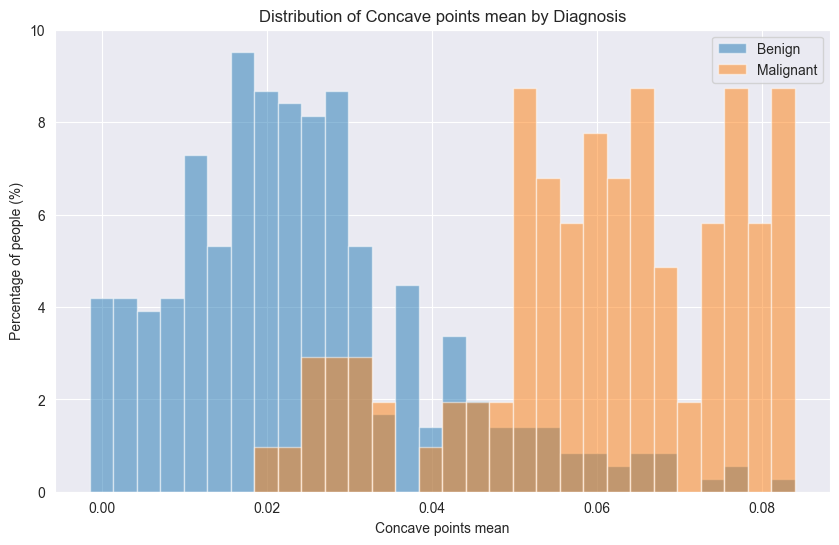

In [25]:
benign = df[df['diagnosis'] == 'B']['concave points_mean']
malignant = df[df['diagnosis'] == 'M']['concave points_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Concave points mean by Diagnosis')
plt.xlabel('Concave points mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

### Symmetry mean

**Symmetry Mean** measures how symmetrical the shape of the cell nucleus is. Lower values indicate more regular, symmetric shapes; higher values suggest asymmetry, often linked to malignant tumors.


In [26]:
df = data[['diagnosis', 'symmetry_mean']]
df

,diagnosis,symmetry_mean
0,M,0.2419
1,M,0.1812
2,M,0.2069
3,M,0.2597
4,M,0.1809
...,...,...
564,M,0.1726
565,M,0.1752
566,M,0.1590
567,M,0.2397


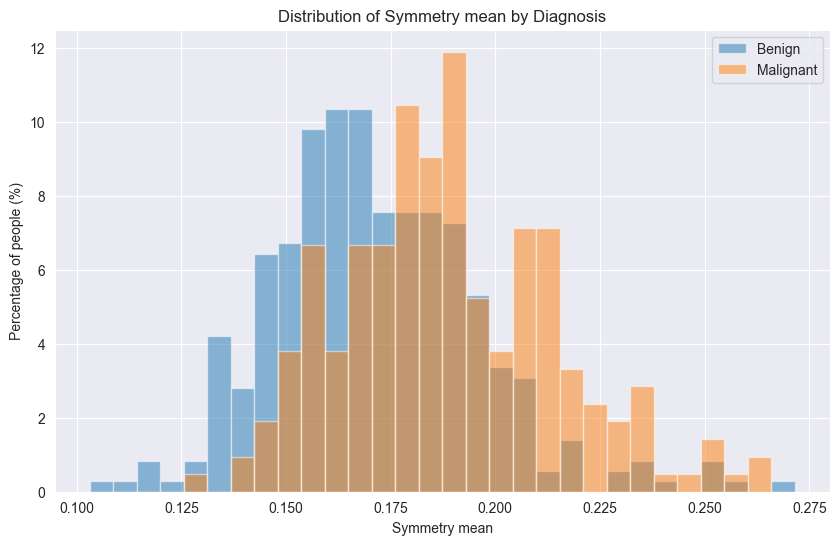

In [27]:
benign = df[df['diagnosis'] == 'B']['symmetry_mean']
malignant = df[df['diagnosis'] == 'M']['symmetry_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Symmetry mean by Diagnosis')
plt.xlabel('Symmetry mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

### Fractal dimension mean

**Fractal Dimension Mean** quantifies the complexity of the cell nucleus boundary. Higher values indicate more intricate and irregular shapes, which are often associated with malignant tumors.


In [28]:
df = data[['diagnosis', 'fractal_dimension_mean']]
df

,diagnosis,fractal_dimension_mean
0,M,0.07871
1,M,0.05667
2,M,0.05999
3,M,0.09744
4,M,0.05883
...,...,...
564,M,0.05623
565,M,0.05533
566,M,0.05648
567,M,0.07016


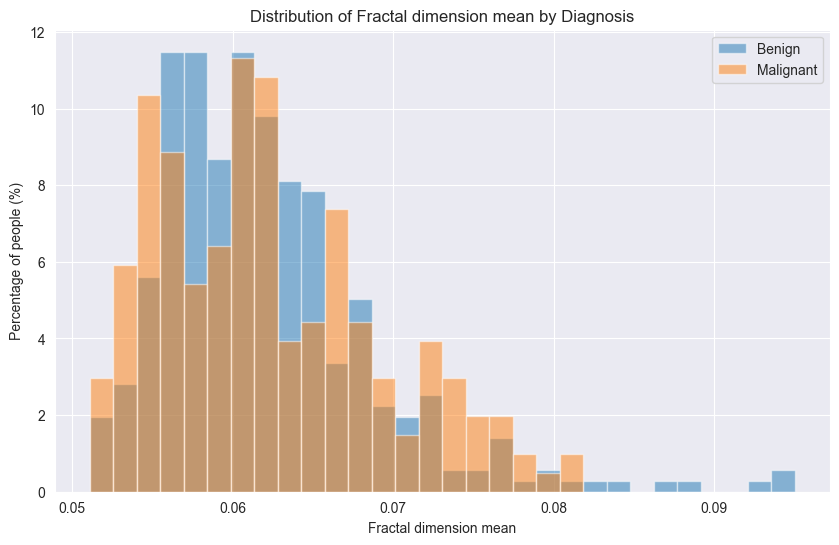

In [29]:
benign = df[df['diagnosis'] == 'B']['fractal_dimension_mean']
malignant = df[df['diagnosis'] == 'M']['fractal_dimension_mean']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Fractal dimension mean by Diagnosis')
plt.xlabel('Fractal dimension mean')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

# Random Forest Algorithm

### Step 1

We loaded the dataset and removed two unnecessary columns: `id`, which serves only as an identifier, and `Unnamed: 32`, which contains no useful data.


In [30]:
rf_data = pd.read_csv("data/data.csv")
rf_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [31]:
rf_data = data.drop(columns=['id', 'Unnamed: 32'])
rf_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Step 2

We converted the `diagnosis` column from categorical values ('B' for benign, 'M' for malignant) to numerical values (0 and 1) to prepare the data for machine learning algorithms.


In [32]:
rf_data['diagnosis'] = rf_data['diagnosis'].map({'B': 0, 'M': 1})

In [33]:
rf_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Step 3

We separated the dataset into features (`X`) and target (`y`). The `diagnosis` column was assigned as the target variable, while all other columns were used as input features.


In [34]:
X = rf_data.drop('diagnosis', axis=1)
y = rf_data['diagnosis']

### Step 4

We split the data into training and testing sets using an 80/20 ratio. This allows us to train the model on one portion of the data and evaluate its performance on unseen data.


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5

We created a Random Forest Classifier and trained it on the training data. This algorithm builds multiple decision trees and combines their outputs to improve prediction accuracy and control overfitting.


In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 6

We used the trained model to make predictions on the test set and evaluated its performance using accuracy, a classification report, and a confusion matrix. These metrics help assess how well the model distinguishes between benign and malignant cases.


In [37]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
 [[70  1]
 [ 3 40]]


### Step 7

We visualized the feature importances calculated by the Random Forest model. This helps identify which features contribute most to the prediction, providing insights into the most relevant indicators for distinguishing between benign and malignant tumors.


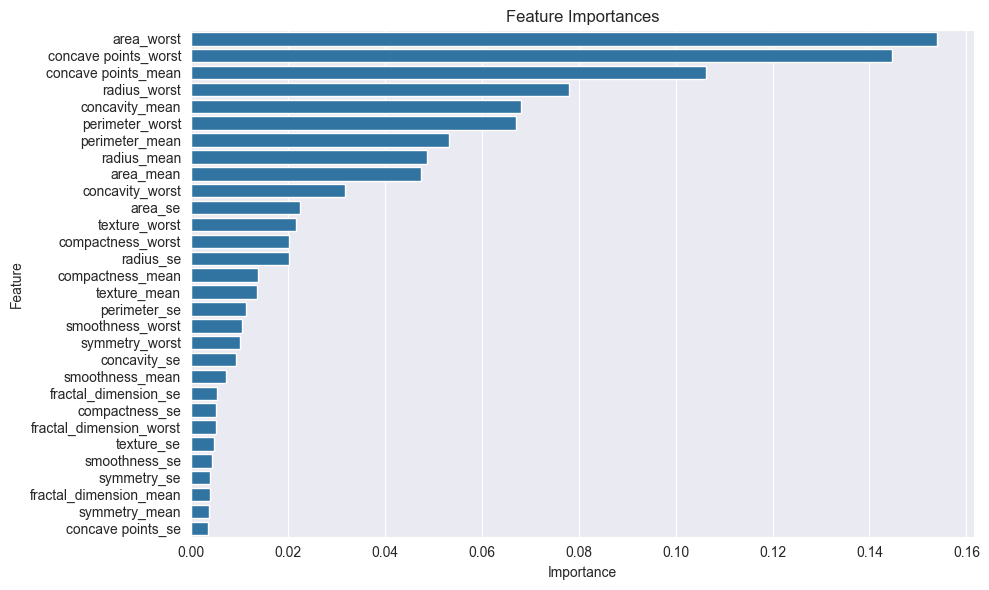

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns_1

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns_1.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Feature Importance Analysis - area_worst, concave points_worst, concave points_mean, radius_worst

Before continuing with the evaluation of the model's overall performance, we take a brief detour to explore the **most important features** identified by the Random Forest algorithm. Understanding which features contribute most to the model's decisions provides valuable insights into the underlying data patterns and can guide further analysis or feature engineering.


In [45]:
df = rf_data[['diagnosis', 'area_worst']]
rf_data['diagnosis'] = rf_data['diagnosis'].map({0: 'B', 1: 'M'})
df

,diagnosis,area_worst
0,M,2019.0
1,M,1956.0
2,M,1709.0
3,M,567.7
4,M,1575.0
...,...,...
564,M,2027.0
565,M,1731.0
566,M,1124.0
567,M,1821.0


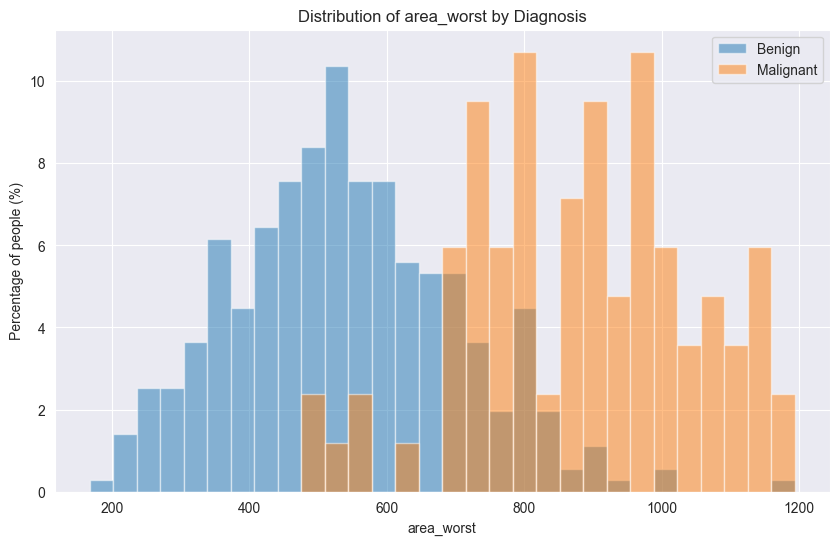

In [46]:
benign = df[df['diagnosis'] == 'B']['area_worst']
malignant = df[df['diagnosis'] == 'M']['area_worst']

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of area_worst by Diagnosis')
plt.xlabel('area_worst')
plt.ylabel('Percentage of people (%)')

plt.legend()
plt.show()

# Significance Testing of area_worst Between Classes

In [47]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(benign, malignant, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

T-statistic: -20.571, p-value: 0.00000


### Independent t-test Explanation

To determine whether the difference in the `area_worst` feature between benign and malignant tumors is statistically significant, we applied an **independent t-test**. This test compares the **mean values** of two independent groups and evaluates whether any observed difference is likely due to random chance.

In our case, the t-test resulted in a **T-statistic of -20.571** and a **p-value of 0.00000**, which strongly suggests that the difference in `area_worst` between the two groups is **statistically significant**. This indicates that `area_worst` is a highly informative feature for distinguishing between benign and malignant diagnoses.


# Boxplot of area_worst by Diagnosis

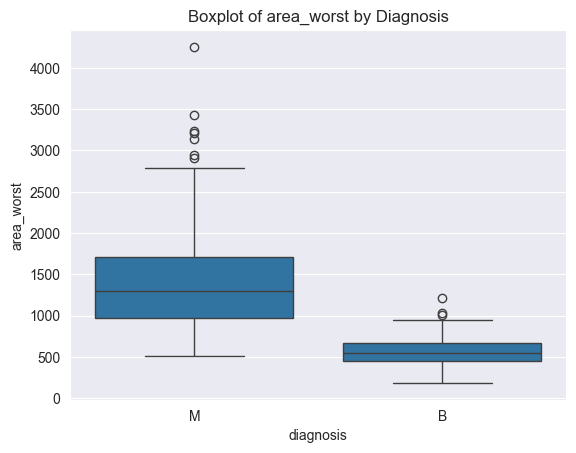

In [48]:
sns.boxplot(x=df['diagnosis'], y=df['area_worst'])
plt.title("Boxplot of area_worst by Diagnosis")
plt.show()


We can observe that:
- **Malignant tumors** tend to have significantly higher `area_worst` values, with a wider spread and multiple outliers.
- **Benign tumors** show lower and more tightly clustered values of `area_worst`.
- There is minimal overlap between the groups, indicating that `area_worst` is a strong distinguishing feature for tumor classification.

This visual confirms the result of the t-test and supports the use of `area_worst` as an important predictive feature in the model.

# Test prediction

In [40]:
rf_data = pd.read_csv("data/data.csv")
rf_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [41]:
# new_data = pd.DataFrame([[
#     33.54, 24.36, 187.46, 1566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766,
#     0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.014600, 0.02387, 0.013150, 0.01980, 0.002300,
#     15.11, 19.26, 99.70, 1711.2, 0.1440, 0.1773, 0.2390, 0.12880, 0.2977, 0.07259
# ]], columns=X.columns)
# 
# 
# prediction = model.predict(new_data)
# 
# print("Malignant" if prediction[0] == 1 else "Benign")



### Step 8 - Create and save model

In [42]:
# import pickle
# 
# with open("rf_model.pkl", "wb") as f:
#     pickle.dump(model, f)


In [43]:
# with open("rf_model.pkl", "rb") as f:
#     model = pickle.load(f)